# **ENDG 511 - Lab 1: Introduction to Deep Neural Networks using TensorFlow**

This colab notebook provides code and a framework for ***Lab 1***. You can work out your solutions here. The example in this lab was inspired by https://www.tensorflow.org/tutorials/quickstart/beginner, with some modifications and additions.


## Goals

In this lab, you will be introduced to the baiscs of TensorFlow and Keras, and you will learn how to use them to create deep learning models. The goals of this lab are:

- Understand the basic workflow for creating models in TensorFlow.
- Understand how to train TensorFlow models.
- Evaluate models in terms of accuracy, size and inference time.
- Understand how different model parameters can impact accuracy, size and inference time

## Layout
This lab is split into **two** parts. 
- **Part 1**: Run through the full example to gain familiarity with TensorFlow. And complete the exercises.
- **Part 2**: Convlutional Neural Netowrks Using TensorFlow. And complete the exercises.

# **Part 1**: Neural Network Machine Learning Model Using TensorFlow

This part of the lab demonstrates building and training a Neural Network to classify MNIST images. This tutorial uses TensorFlow and it is meant to give you a better understanding of how to build, train and evaluate machine learning models using TensorFlow.

### Import TensorFlow and Other Required Modules

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time
import tempfile

2024-01-16 19:03:07.816431: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-16 19:03:07.848661: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-16 19:03:07.848692: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-16 19:03:07.850007: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-16 19:03:07.856002: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-16 19:03:07.856853: I tensorflow/core/platform/cpu_feature_guard.cc:1

### Download and prepare the MNIST dataset

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9


In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


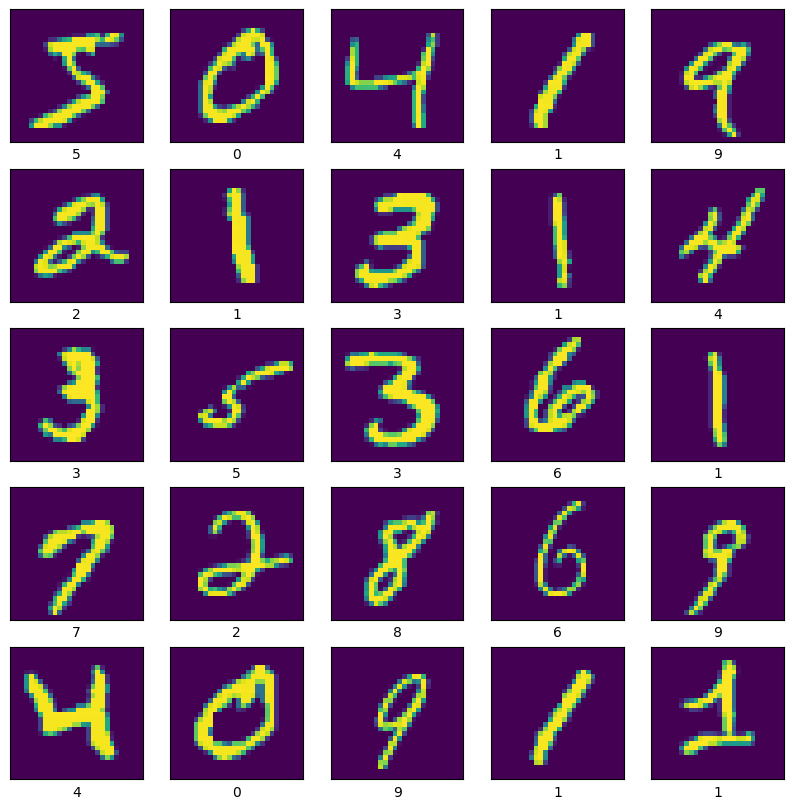

In [3]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build Machine Learning Model

***Sequential*** is useful for stacking layers where each layer has one input tensor and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the Flatten, Dense, and Dropout layers.

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

Let's display the architecture of our model:

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Save and Load Model
Let us save and load the model before training. This allows us to save the randomized weights and biases and make more accurate comparisons. We will use the saved model in the exercise section.

In [6]:
# Save your model
model.save('part1_model.h5')

# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('part1_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Compile and train the model

When compiling a model, an optimizer, a loss function and metrics need to be defined. 

- Optimizer: The Adam optimizer is the most popular optimizer and generally works well for classification and regression problems. It is based of gradient descent algorithms.
- Loss Function: The loss function is the function that computes the distance between the current output of the algorithm and the expected output. These functions need to be chosen depending on the application, the SparseCategoricalCrossentropy for example computes the crossentropy loss between the labels and predictions.
- Metrics: A metric is a function that is used to judge the performance of your model. This could be accuracy, mean squared error, cosine similarity or whatever metric works best for your use case.

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5


2024-01-16 19:03:12.614472: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2974 - accuracy: 0.9140 - val_loss: 0.1391 - val_accuracy: 0.9592
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1417 - accuracy: 0.9574 - val_loss: 0.1005 - val_accuracy: 0.9670
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1053 - accuracy: 0.9685 - val_loss: 0.0831 - val_accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0854 - accuracy: 0.9731 - val_loss: 0.0807 - val_accuracy: 0.9753
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0739 - accuracy: 0.9771 - val_loss: 0.0784 - val_accuracy: 0.9760


### Plot accuracy and loss graphs

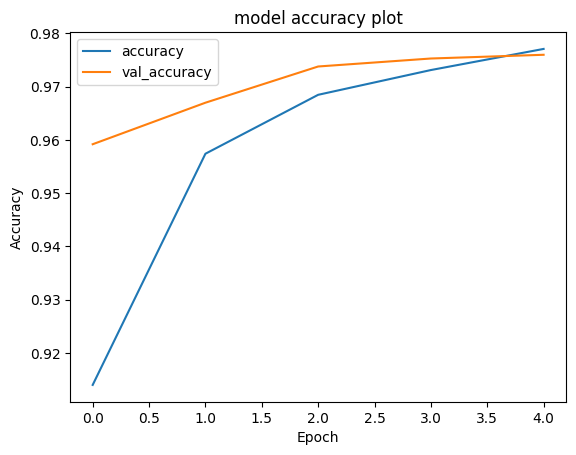

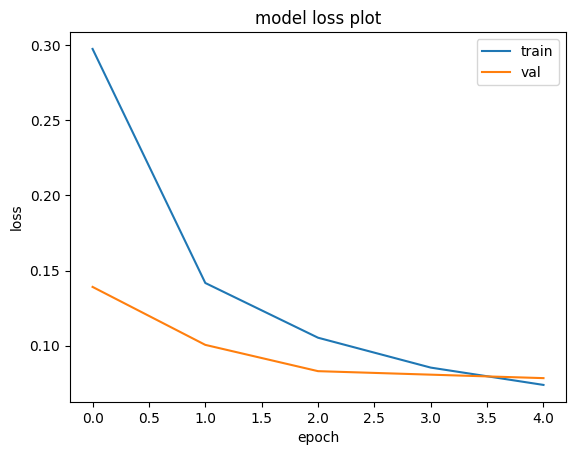

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

### Evaluate the model
There are many metrics that can be used to evaluate a model. We will focus on three metrics for this lab:
1. Model Loss and Accuracy
2. Model Size
3. Inference time

In [9]:
# Evaluate prediction accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part1_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 0s - loss: 0.0784 - accuracy: 0.9760 - 294ms/epoch - 938us/step
313/313 [==============================] - 0s 1ms/step

Model Accuracy: 97.60000109672546 %
Model Size: 374822.00 bytes
Inference Time is 7.32480764389038e-05 s


### Excercies (2.5 points)


Question 1: Load the untrained model. Change the learning rate to 1.5, recompile and retrain the model and display the accuracy and loss plots. What do you observe? **(0.5 point)**

Question 2: Load the untrained model. Change the learning rate to 0.0001, recompile and retrain the model and display the accuracy and loss plots. What do you observe? **(0.5 point)**

Question 3: Rebuild the model with 8 neurons in the first Dense layer instead of 128. Then recompile and retrain the model and save it. Finally compare the new size, accuracy and inference time to the original model. **(0.75 point)**

Question 4: Rebuild the model with 2048 neurons in the first Dense layer instead of 128. Then recompile and retrain the model and save it. Finally compare the new size, accuracy and inference time to the original model. **(0.75 point)**

#### Question 1

In [19]:
# Load the untrained model
model_q1 = tf.keras.models.load_model("part1_model.h5")

In [20]:
#Recompile and retrain model with the learning rate as 1.5
optimizer = tf.keras.optimizers.Adam(learning_rate=1.5)
model_q1.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_q1.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5


2024-01-16 19:15:25.372014: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 11.6341 - accuracy: 0.1037 - val_loss: 2.4202 - val_accuracy: 0.1010
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4597 - accuracy: 0.0992 - val_loss: 2.4194 - val_accuracy: 0.1028
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4520 - accuracy: 0.1006 - val_loss: 2.4078 - val_accuracy: 0.1009
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4830 - accuracy: 0.0988 - val_loss: 2.4546 - val_accuracy: 0.1028
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4627 - accuracy: 0.1024 - val_loss: 2.4901 - val_accuracy: 0.1028


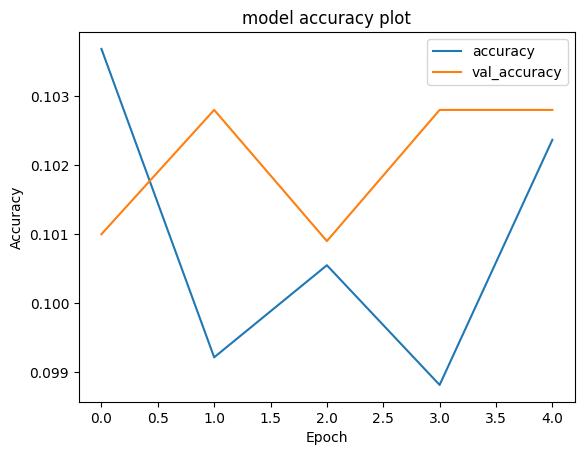

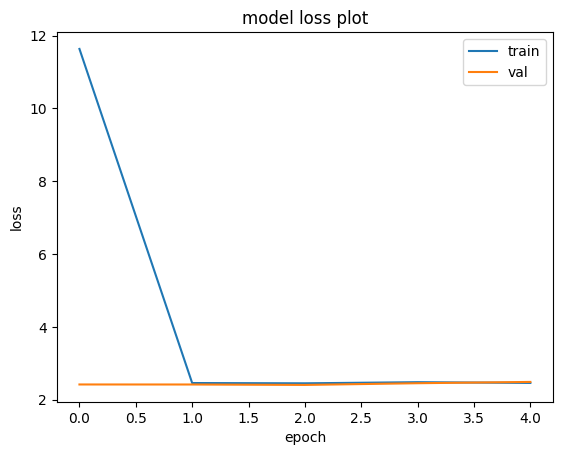

In [21]:
#Plot accuracy and loss plots
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

Based on the plots, it looks as if the model cannot reach a validation accuracy of higher than 0.103, which is very low compared to 0.97 from previously. 

#### Question 2

In [22]:
#Load the untrained model
model_q2 = tf.keras.models.load_model("part1_model.h5")

In [23]:
#Recompile and retrain model with the learning rate as 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_q2.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_q2.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5


2024-01-16 19:20:58.252408: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6953 - accuracy: 0.8134 - val_loss: 0.3285 - val_accuracy: 0.9125
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3379 - accuracy: 0.9058 - val_loss: 0.2579 - val_accuracy: 0.9280
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2720 - accuracy: 0.9242 - val_loss: 0.2169 - val_accuracy: 0.9390
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2352 - accuracy: 0.9333 - val_loss: 0.1923 - val_accuracy: 0.9443
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2076 - accuracy: 0.9413 - val_loss: 0.1703 - val_accuracy: 0.9499


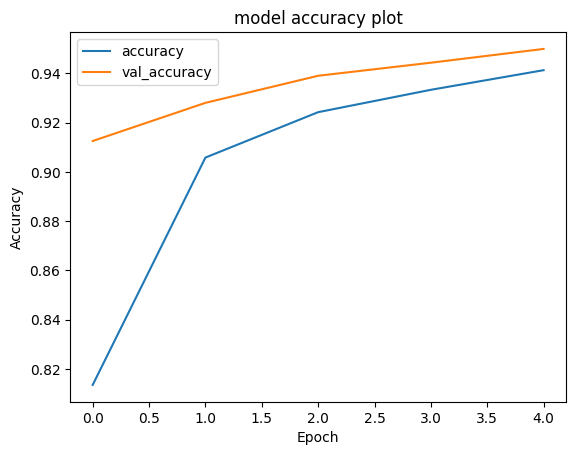

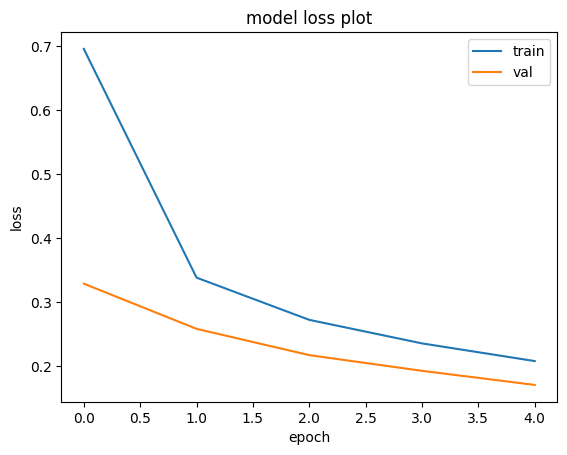

In [24]:
#Plot accuracy and loss plots
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

When using a learning rate of 0.0001, I noticed that the accuracy was above 90 again and the loss dropped lower than 0.2 on validation. When comparing the results of question 1 and 2 to the original learning rate, it can be seen that the accuracy drops the bigger the number is, and also starts to drop off if the rate is too small. The peak accuracy of the model based off learning rate seems to be around 0.001.

#### Question 3

In [30]:
#Rebuild the model with 8 neurons in the first dense layer
model_q3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [26]:
#Recompile and retrain
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_q3.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_q3.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0014 - accuracy: 0.6444 - val_loss: 0.4368 - val_accuracy: 0.8738
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7138 - accuracy: 0.7550 - val_loss: 0.3741 - val_accuracy: 0.8909
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6741 - accuracy: 0.7736 - val_loss: 0.3654 - val_accuracy: 0.8953
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6458 - accuracy: 0.7806 - val_loss: 0.3485 - val_accuracy: 0.8979
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6338 - accuracy: 0.7836 - val_loss: 0.3410 - val_accuracy: 0.9042


In [27]:
#Save the model
model_q3.save("part1_model_q3.h5")

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
# Evaluate prediction accuracy
test_loss, test_acc = model_q3.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part1_model_q3.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 0s - loss: 0.3410 - accuracy: 0.9042 - 318ms/epoch - 1ms/step
313/313 [==============================] - 0s 926us/step

Model Accuracy: 90.420001745224 %
Model Size: 71335.00 bytes
Inference Time is 4.594473838806152e-05 s


In comparison to the original model, the model with 8 neurons in the first dense layer is about 7% less accurate, however the model is much smaller than the original and has a smaller inference time, meaning it took less time to train the model on new data. In summary, having less nuerons means you are sacrificing aaccuracy for a quicker and smaller model. This can be helpful when you're using the model in smaller applications, such as putting the model onto a small device such as a raspberry pi. 

#### Question 4

In [31]:
#Rebuild the model with 2048 neurons in the first dense layer
model_q4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(2048, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [32]:
#Recompile and retrain
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_q4.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_q4.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1937 - accuracy: 0.9417 - val_loss: 0.0886 - val_accuracy: 0.9729
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0885 - accuracy: 0.9720 - val_loss: 0.1030 - val_accuracy: 0.9675
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0634 - accuracy: 0.9801 - val_loss: 0.0738 - val_accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0497 - accuracy: 0.9837 - val_loss: 0.0792 - val_accuracy: 0.9780
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0409 - accuracy: 0.9869 - val_loss: 0.0799 - val_accuracy: 0.9776


In [33]:
#Save the model
model_q4.save("part1_model_q4.h5")

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
# Evaluate prediction accuracy
test_loss, test_acc = model_q4.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part1_model_q4.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 0.0799 - accuracy: 0.9776 - 716ms/epoch - 2ms/step
313/313 [==============================] - 0s 929us/step

Model Accuracy: 97.75999784469604 %
Model Size: 16927676.00 bytes
Inference Time is 4.308605194091797e-05 s


With 2048 neurons, we see similar accuracy with the original model, only slightly higher. This model also shows similar inference time as the model with 8 neurons. In my opinion, using 128 neurons is much more practical because this model is much larger with only a slight increase in accuracy. The accuracy seems to reach a limit around 97%, and so increasing the size of the model won't further improve the accuracy any more than needed.

# **Part 2**: Convlutional Neural Netowrks Using TensorFlow

### Introduction:

Convolutional Neural Networks (CNN) are distinguished by their ability to identify patterns and features in images (e.g. edges, lines, circles or even objects). CNN's are widely adopted in computer vision applications and found success in audio signals and text. 


A typical Convolutional neural network is composed mainly of three types of layers:

* **Convolutional layer:** The core building block of a CNN, which consists of Filters or kernels to detect features. Generally, the first convolutional layers detect simple features (e.g. edges) and later layers identify objects. 
* **Pooling layer:** Reduces the spatial size of the feature maps so having fewer learnable weights and less computation cost.
* **Fully-connected layer:**  Known as the output layer, where the last identified feature maps are flattened and connected to dense layers for the classification task.



### Import TensorFlow and Other Required Modules

In [10]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time
import tempfile

### Download and prepare the MNIST dataset
Similar to Part 1, loading the MNIST dataset and performing normalization to improve the training performance and speed.

In [11]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Build Machine Learning Model
In this part, we will build the LeNet-5 CNN model, one of the earliest CNN architectures proposed by Yann LeCun and others for recognizing handwritten and machine-printed characters.

The LeNet-5 architecture cosisits of 2 convolutional layers, 2 pooling layers and fully connected layers as shown in the figure below.

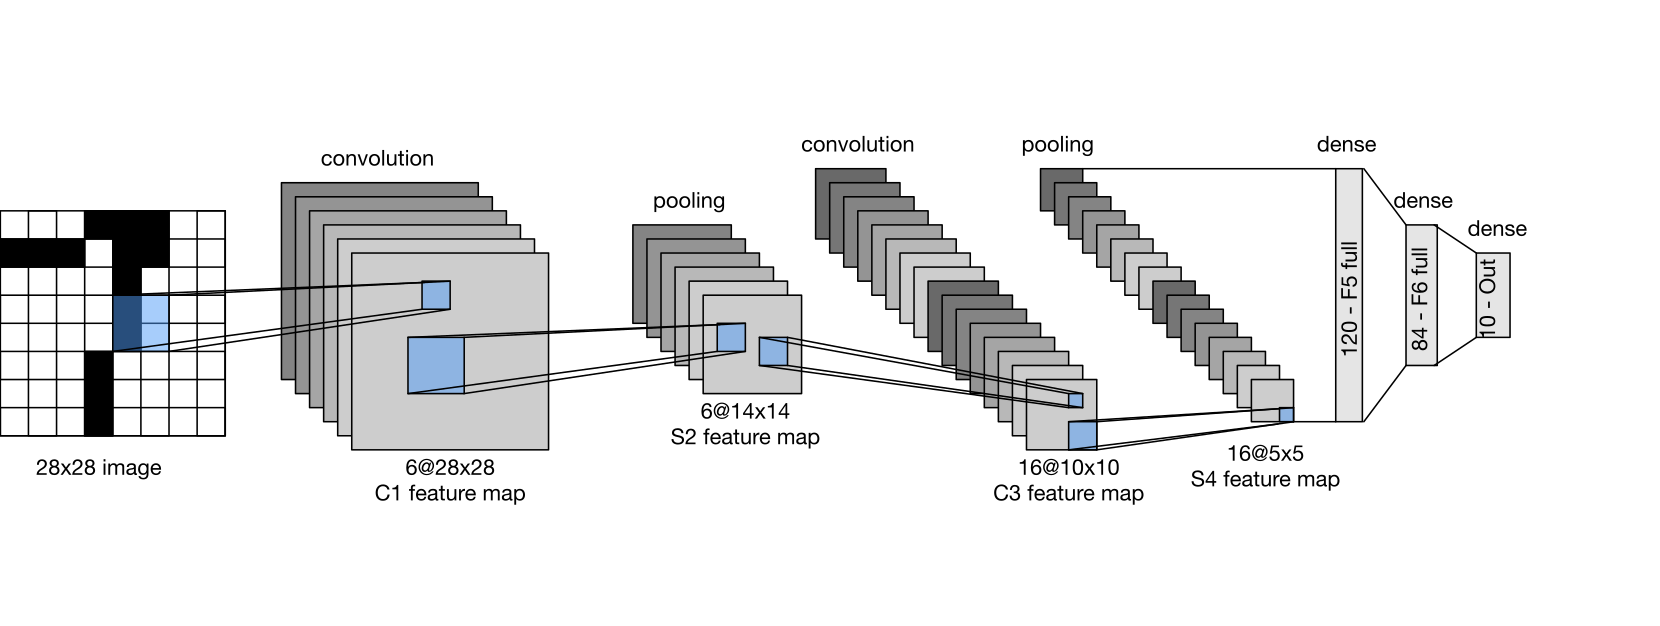

[Image Source](https://d2l.ai/chapter_convolutional-neural-networks/lenet.html#img-lenet)

In [12]:
lenet_5_model = models.Sequential()
# Convolutional layer1: cosits of 6 filters, filter size 5x5 and stride of 1
lenet_5_model.add( layers.Conv2D(filters = 6, kernel_size = (5,5),strides=1, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
#Pooling layer 1
lenet_5_model.add(layers.AveragePooling2D(pool_size = (2,2)))
# Convolutional layer2: cosits of 16 filters, filter size 5x5 and stride of 1
lenet_5_model.add(layers.Conv2D(filters = 16, kernel_size = 5,strides=1, activation = 'relu'))
#Pooling layer 2 
lenet_5_model.add(layers.AveragePooling2D(pool_size = (2,2)))

#Output layer( Fully connected layers)
lenet_5_model.add(layers.Flatten())
lenet_5_model.add(layers.Dense(120, activation='relu'))
lenet_5_model.add(layers.Dense(84, activation='relu'))
lenet_5_model.add(layers.Dense(10, activation='softmax'))

# Save your model
lenet_5_model.save('part2_model.h5')


lenet_5_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 120)              

### Compile and train the model


In [13]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lenet_5_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = lenet_5_model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5


2024-01-16 19:03:35.990511: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 23s 12ms/step - loss: 0.2126 - accuracy: 0.9343 - val_loss: 0.0827 - val_accuracy: 0.9745
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0677 - accuracy: 0.9795 - val_loss: 0.0495 - val_accuracy: 0.9849
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0480 - accuracy: 0.9854 - val_loss: 0.0443 - val_accuracy: 0.9868
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0383 - accuracy: 0.9882 - val_loss: 0.0452 - val_accuracy: 0.9858
Epoch 5/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.0347 - val_accuracy: 0.9894


### Plot accuracy and loss graphs

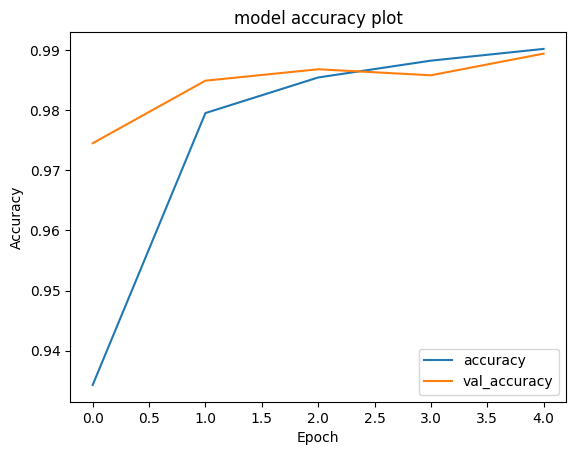

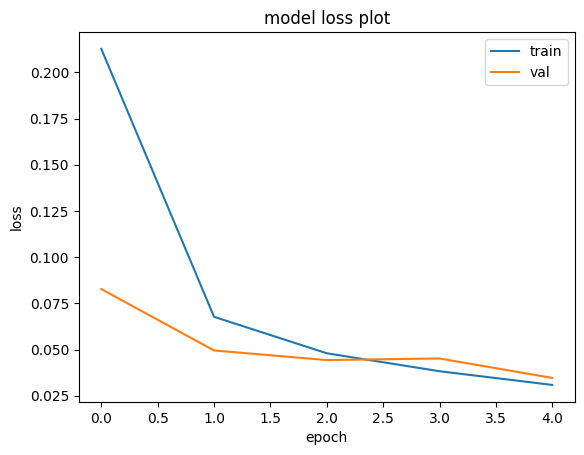

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

### Evaluate the model
Applying the same evaluation metrics in part 1 to evaluate the trained CNN model:

1. Model Loss and Accuracy
2. Model Size
3. Inference time

In [15]:
# Evaluate prediction accuracy
test_loss, test_acc = lenet_5_model.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = lenet_5_model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part2_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 2s - loss: 0.0347 - accuracy: 0.9894 - 2s/epoch - 5ms/step
313/313 [==============================] - 2s 5ms/step

Model Accuracy: 98.94000291824341 %
Model Size: 228343.00 bytes
Inference Time is 0.00017378365993499757 s


## Excercises: (2.5 points)
Q1: Briefly compare the Fully connected (FC) model in part 1 and the CNN model in part 2 in terms of the model size, accuracy and inference time.**(0.5 point)**


---




 



Q2: Modify the two convolutional layers of the LeNet-5 stride value into 2 and discuss the effect on the model size and accuracy. If the perfromance is affected, explain the reason? **(0.5 point)**


Q3: Replace the average-pooling layer with a max-pooling layer for the LeNet-5 CNN model and discuss the effect on the trained model size and accuracy.**(0.5 point)**


Q4: IoT devices are limited in storage and computation resources. Therefore lightweight machine-learning or compressed models are ideal for IoT edge devices. 

In this exercise, you will modify the LeNet-5 CNN model on the MNIST dataset to reduce its size as much as possible (expecting less than 13k parameters) while maintaining inference accuracy equal to or above 95%. There is no limitation to the applied modifications. You may modify the number of filters, filter size, stride value, fully connected layers etc.**(1 point)**
